In [3]:
import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td
from functools import partial
from pathlib import Path
from tabulate import tabulate
import lnoi400

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

pdk = gf.get_active_pdk()
layer_stack = pdk.get_layer_stack()

core = layer_stack.layers["ridge"]
clad = layer_stack.layers["clad"]
substrate = layer_stack.layers["substrate"]
box = layer_stack.layers["box"]

print(
    f"""Stack:
- {clad.material} clad with {clad.thickness}µm
- {core.material} clad with {core.thickness}µm
- {substrate.material} clad with {substrate.thickness}µm
- {box.material} clad with {box.thickness}µm"""
)

Stack:
- sio2 clad with 2.0µm
- ln clad with 0.2µm
- si clad with 10.0µm
- sio2 clad with 4.7µm


In [13]:
print(layer_stack)

layers={'substrate': LayerLevel(name=None, layer=WAFER, derived_layer=None, thickness=10.0, thickness_tolerance=None, width_tolerance=None, zmin=-14.7, zmin_tolerance=None, sidewall_angle=0.0, sidewall_angle_tolerance=None, width_to_z=0.0, z_to_bias=None, bias=None, mesh_order=101, material='si', info={}), 'box': LayerLevel(name=None, layer=WAFER, derived_layer=None, thickness=4.7, thickness_tolerance=None, width_tolerance=None, zmin=-4.7, zmin_tolerance=None, sidewall_angle=0.0, sidewall_angle_tolerance=None, width_to_z=0.0, z_to_bias=None, bias=None, mesh_order=100, material='sio2', info={}), 'slab': LayerLevel(name=None, layer=LN_SLAB, derived_layer=None, thickness=0.2, thickness_tolerance=None, width_tolerance=None, zmin=0.0, zmin_tolerance=None, sidewall_angle=13.0, sidewall_angle_tolerance=None, width_to_z=0.0, z_to_bias=None, bias=None, mesh_order=1, material='ln', info={}), 'ridge': LayerLevel(name=None, layer=LN_RIDGE, derived_layer=None, thickness=0.2, thickness_tolerance=Non

PosixPath('lxt_ubend.gds')

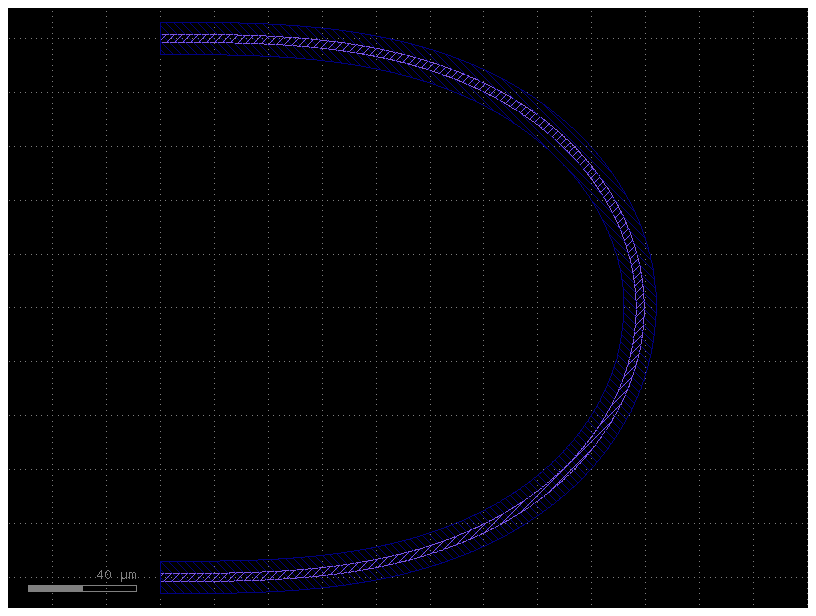

In [4]:
component = lnoi400.cells.U_bend_racetrack(v_offset=200)
component.plot()
component.write_gds("lxt_ubend.gds", with_metadata=True)

In [10]:
length = component.info['length']
print(length)

print(np.pi * 100 *2)
print(36.67+45.51+51.26+37.56+36.44+36.17+32.12+38.53+44.68+51.74+47.87)

456.351
628.3185307179587
458.55


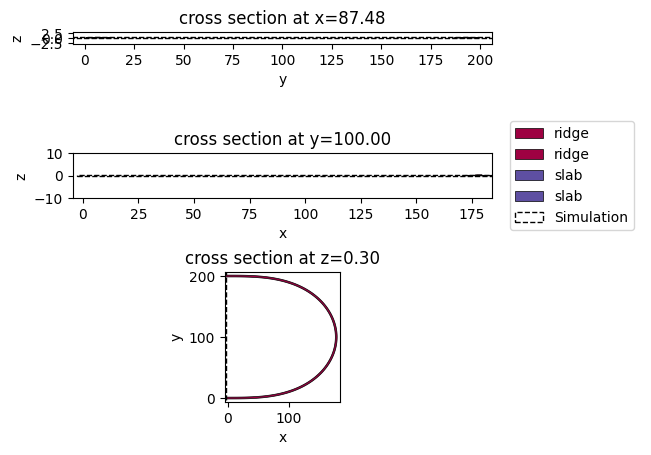

In [ ]:
mapping = {
'ln' : td.Medium(name="Si", permittivity=3.47**2),
'si' : td.Medium(name="Si", permittivity=3.47**2),
'sio2' : td.Medium(name="SiO2", permittivity=1.47**2)
}

# setup the tidy3d component
c = gt.Tidy3DComponent(
    component=component,
    layer_stack=layer_stack,
    material_mapping=mapping
)

# plot the component and the layerstack
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=3, width_ratios=(3, 1))
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
axl = fig.add_subplot(gs[1, 1])
c.plot_slice(x="ridge", ax=ax0)
c.plot_slice(y="ridge", ax=ax1)
c.plot_slice(z="ridge", ax=ax2)

ax0.set_ylim([-3, 3])
ax1.set_ylim([-10, 10])
axl.legend(*ax0.get_legend_handles_labels(), loc="center")
axl.axis("off")
plt.show()